In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

print("Stock Price Prediction project started 🚀")


Stock Price Prediction project started 🚀


In [2]:
!pip install yfinance



In [7]:
import yfinance as yf

# Download Apple stock data
df = yf.download("AAPL", start="2018-01-01", end="2024-01-01")

df.head()


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2018-01-02,40.341892,40.351262,39.639317,39.850091,102223600
2018-01-03,40.334858,40.878185,40.271629,40.405116,118071600
2018-01-04,40.522221,40.625266,40.299739,40.407465,89738400
2018-01-05,40.983574,41.070224,40.526901,40.618235,94640000
2018-01-08,40.831356,41.126437,40.732992,40.831356,82271200


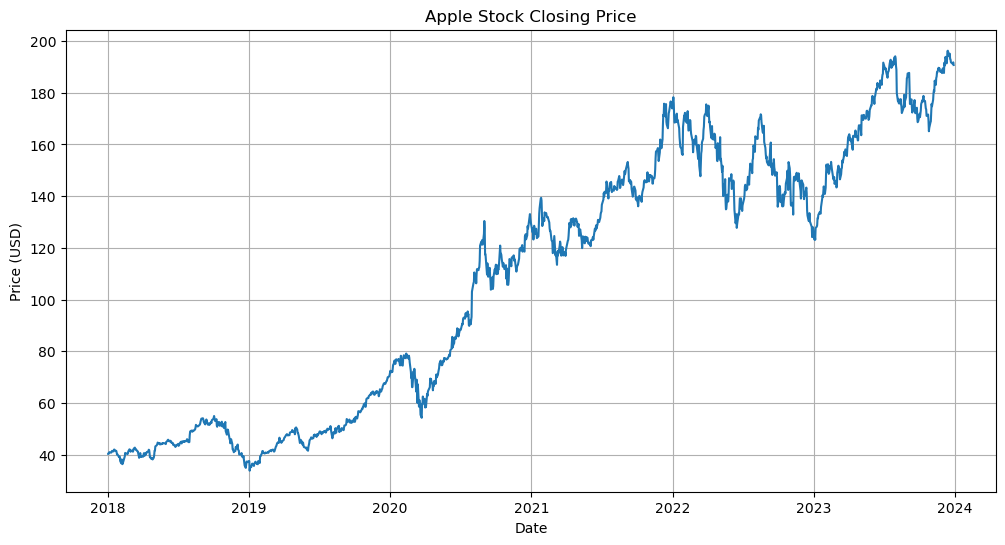

In [8]:
plt.figure(figsize=(12,6))
plt.plot(df['Close'])
plt.title("Apple Stock Closing Price")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.grid(True)
plt.show()


In [9]:
df.describe()


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
count,1509.000000,1509.000000,1509.000000,1509.000000,1.509000e+03
mean,107.824407,108.952048,106.584251,107.724451,1.073284e+08
std,50.934094,51.407897,50.406556,50.893120,5.513287e+07
min,33.799671,34.638779,33.754506,34.225167,2.404830e+07
25%,51.237442,52.040457,50.858414,51.374821,7.078370e+07
50%,120.464722,121.718784,118.965608,120.605510,9.296430e+07
75%,150.220779,151.972500,148.223238,150.046379,1.280440e+08
max,196.256577,197.752444,195.156959,196.167422,4.265100e+08


In [10]:
data = df[['Close']]
data.head()


Price,Close
Ticker,AAPL
Date,
2018-01-02,40.341892
2018-01-03,40.334858
2018-01-04,40.522221
2018-01-05,40.983574
2018-01-08,40.831356


In [11]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data)

scaled_data[:5]


array([[0.0402705 ],
       [0.0402272 ],
       [0.04138051],
       [0.04422036],
       [0.04328339]])

In [12]:
X = []
y = []

window_size = 60

for i in range(window_size, len(scaled_data)):
    X.append(scaled_data[i-window_size:i])
    y.append(scaled_data[i])

X, y = np.array(X), np.array(y)

X.shape, y.shape


((1449, 60, 1), (1449, 1))

In [13]:
split = int(0.8 * len(X))

X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

X_train.shape, X_test.shape


((1159, 60, 1), (290, 60, 1))

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


In [15]:
!pip install tensorflow


In [16]:
import tensorflow as tf
print(tf.__version__)


2.20.0


In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


In [18]:
model = Sequential()

model.add(LSTM(50, return_sequences=True, input_shape=(60, 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

model.summary()


C:\Users\solan\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
history = model.fit(
    X_train,
    y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_test, y_test)
)


Epoch 1/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - loss: 0.0352 - val_loss: 0.0014
Epoch 2/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0013 - val_loss: 0.0012
Epoch 3/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 9.3562e-04 - val_loss: 0.0016
Epoch 4/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 9.1938e-04 - val_loss: 0.0024
Epoch 5/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 8.5738e-04 - val_loss: 0.0012
Epoch 6/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 8.5079e-04 - val_loss: 0.0020
Epoch 7/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 8.4387e-04 - val_loss: 0.0021
Epoch 8/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 8.1018e-04 - val_loss: 0.0019
Epoch 9/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 7.2054e-04 - val_loss: 0.0010
Epoch 10/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 7.0047e-04 - val_loss: 0.0015


In [20]:
predictions = model.predict(X_test)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step


In [21]:
predictions = scaler.inverse_transform(predictions)
y_test_actual = scaler.inverse_transform(y_test)


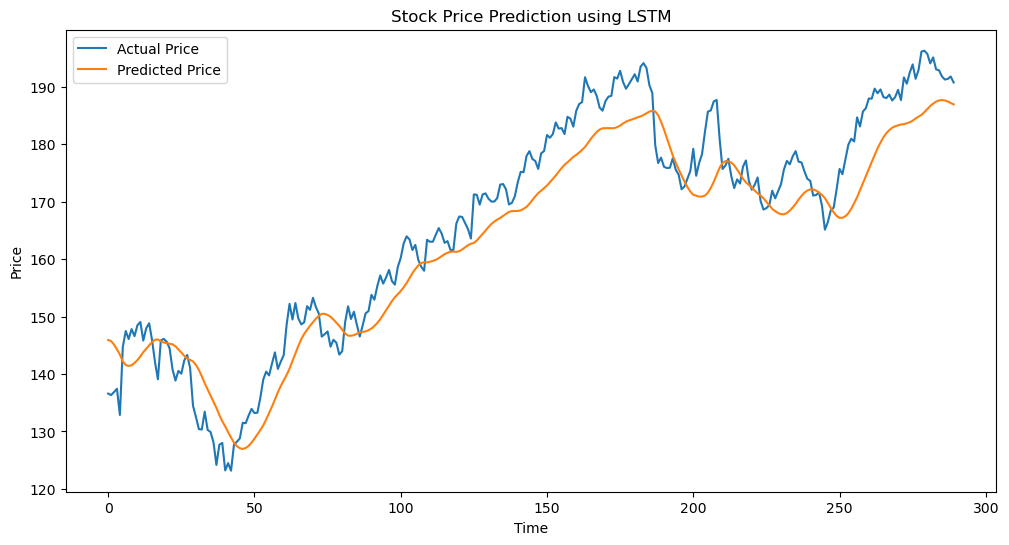

In [22]:
plt.figure(figsize=(12,6))
plt.plot(y_test_actual, label='Actual Price')
plt.plot(predictions, label='Predicted Price')
plt.title('Stock Price Prediction using LSTM')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()


In [23]:
from sklearn.metrics import mean_squared_error
import math

rmse = math.sqrt(mean_squared_error(y_test_actual, predictions))
rmse




6.262790266853863

In [24]:
# Take last 60 days from the dataset
last_60_days = scaled_data[-60:]

future_predictions = []

current_input = last_60_days.copy()

for i in range(30):
    current_input_reshaped = current_input.reshape(1, 60, 1)
    next_pred = model.predict(current_input_reshaped)[0][0]
    future_predictions.append(next_pred)
    current_input = np.append(current_input[1:], [[next_pred]], axis=0)

# Inverse scale
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1,1))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━

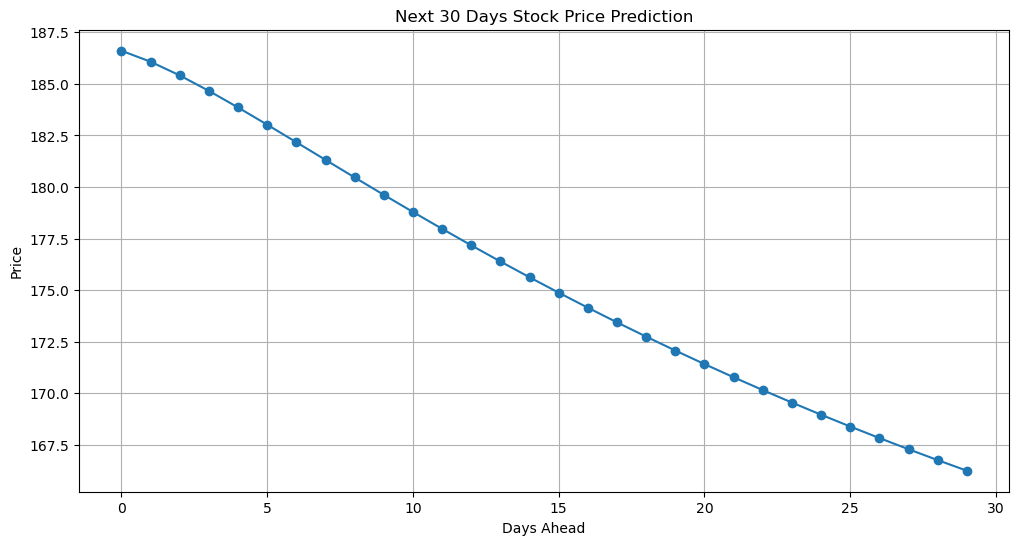

In [25]:
plt.figure(figsize=(12,6))
plt.plot(future_predictions, marker='o')
plt.title("Next 30 Days Stock Price Prediction")
plt.xlabel("Days Ahead")
plt.ylabel("Price")
plt.grid(True)
plt.show()


In [26]:
model.save("lstm_stock_model.h5")


In [27]:
!pip install streamlit


In [28]:
import pandas as pd
import numpy as np

data = df.copy()

# Simple Moving Averages
data['SMA_10'] = data['Close'].rolling(window=10).mean()
data['SMA_30'] = data['Close'].rolling(window=30).mean()

# Exponential Moving Average
data['EMA_10'] = data['Close'].ewm(span=10, adjust=False).mean()

# RSI
delta = data['Close'].diff()
gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
rs = gain / loss
data['RSI'] = 100 - (100 / (1 + rs))

# MACD
ema12 = data['Close'].ewm(span=12, adjust=False).mean()
ema26 = data['Close'].ewm(span=26, adjust=False).mean()
data['MACD'] = ema12 - ema26

data = data.dropna()
data.head()


Price,Close,High,Low,Open,Volume,SMA_10,SMA_30,EMA_10,RSI,MACD
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,,,,
Date,,,,,,,,,,
2018-02-13,38.644009,38.740420,38.011463,38.082008,130196800,37.830209,39.828473,38.107732,39.635407,-0.830887
2018-02-14,39.356503,39.396477,38.300696,38.338317,162579600,37.844785,39.795627,38.334781,46.553768,-0.682005
2018-02-15,40.678036,40.701548,39.739799,39.925563,204588800,37.983317,39.807066,38.760827,52.202796,-0.452165
2018-02-16,40.546341,41.108345,40.391147,40.529883,160704400,38.279171,39.807870,39.085466,55.548303,-0.277444
2018-02-20,40.409962,40.976663,40.308847,40.456990,135722000,38.655299,39.788750,39.326283,56.038322,-0.148272


<Axes: title={'center': 'Price with Moving Averages'}, xlabel='Date'>

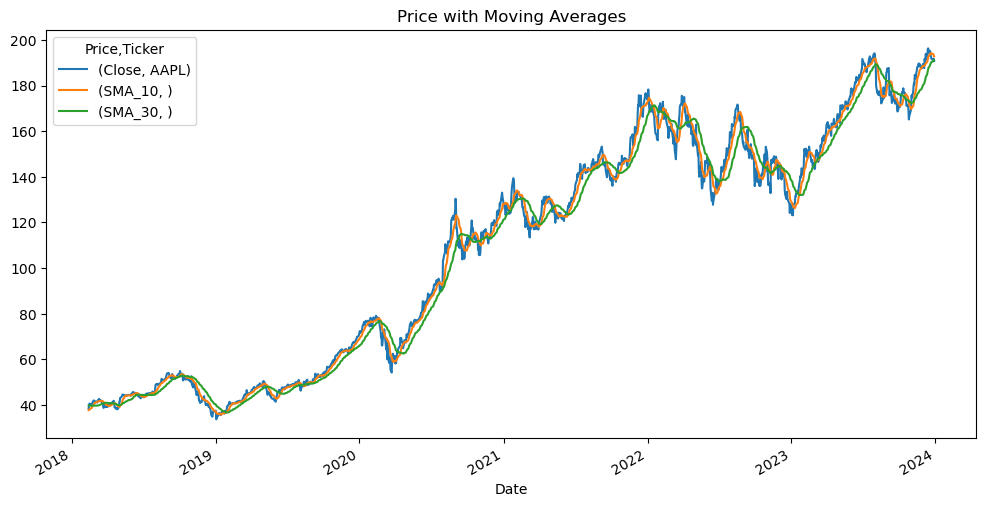

In [29]:
data[['Close', 'SMA_10', 'SMA_30']].plot(figsize=(12,6), title="Price with Moving Averages")


In [30]:
features = data[['Close', 'SMA_10', 'SMA_30', 'EMA_10', 'RSI', 'MACD']]

from sklearn.preprocessing import MinMaxScaler
scaler_multi = MinMaxScaler()
scaled_features = scaler_multi.fit_transform(features)



In [31]:
X_multi = []
y_multi = []
window = 60

for i in range(window, len(scaled_features)):
    X_multi.append(scaled_features[i-window:i])
    y_multi.append(scaled_features[i, 0])  # Predict Close price

X_multi, y_multi = np.array(X_multi), np.array(y_multi)

X_multi.shape, y_multi.shape


((1420, 60, 6), (1420,))

In [32]:
split = int(0.8 * len(X_multi))

X_train_m, X_test_m = X_multi[:split], X_multi[split:]
y_train_m, y_test_m = y_multi[:split], y_multi[split:]


In [33]:
X_multi.shape


(1420, 60, 6)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense

gru_model = Sequential()
gru_model.add(GRU(50, return_sequences=True, input_shape=(60, 6)))
gru_model.add(GRU(50))
gru_model.add(Dense(1))

gru_model.compile(optimizer='adam', loss='mean_squared_error')
gru_model.summary()


In [35]:
history_gru = gru_model.fit(
    X_train_m, y_train_m,
    epochs=10,
    batch_size=32,
    validation_data=(X_test_m, y_test_m)
)



Epoch 1/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - loss: 0.0113 - val_loss: 8.6952e-04
Epoch 2/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 7.2292e-04 - val_loss: 6.2783e-04
Epoch 3/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 3.9995e-04 - val_loss: 9.2560e-04
Epoch 4/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 3.6019e-04 - val_loss: 3.8957e-04
Epoch 5/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 3.3472e-04 - val_loss: 3.8634e-04
Epoch 6/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 3.3977e-04 - val_loss: 5.6793e-04
Epoch 7/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 3.3941e-04 - val_loss: 3.4302e-04
Epoch 8/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 3.1647e-04 - val_loss: 3.3339e-04
Epoch 9/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 2.8648e-04 - val_loss: 4.0995e-04
Epoch 10/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 2.7227e-04 - val_loss: 4.6215e-04


In [36]:
from sklearn.metrics import mean_squared_error
import math

gru_preds = gru_model.predict(X_test_m)
gru_preds_inv = scaler_multi.inverse_transform(
    np.hstack([gru_preds, np.zeros((gru_preds.shape[0], 5))])
)[:,0]

y_test_inv = scaler_multi.inverse_transform(
    np.hstack([y_test_m.reshape(-1,1), np.zeros((y_test_m.shape[0], 5))])
)[:,0]

rmse_gru = math.sqrt(mean_squared_error(y_test_inv, gru_preds_inv))
rmse_gru



9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step


3.4924361491841007

In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

lstm_multi = Sequential()
lstm_multi.add(LSTM(50, return_sequences=True, input_shape=(60, 6)))
lstm_multi.add(LSTM(50))
lstm_multi.add(Dense(1))

lstm_multi.compile(optimizer='adam', loss='mean_squared_error')
lstm_multi.summary()


C:\Users\solan\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 60, 50)         │        11,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,651 (123.64 KB)

 Trainable params: 31,651 (123.64 KB)

 Non-trainable params: 0 (0.00 B)

In [38]:
history_lstm = lstm_multi.fit(
    X_train_m, y_train_m,
    epochs=10,
    batch_size=32,
    validation_data=(X_test_m, y_test_m)
)


Epoch 1/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - loss: 0.0307 - val_loss: 0.0036
Epoch 2/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0022 - val_loss: 0.0096
Epoch 3/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0015 - val_loss: 0.0035
Epoch 4/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0012 - val_loss: 0.0039
Epoch 5/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 9.2460e-04 - val_loss: 0.0024
Epoch 6/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 8.4042e-04 - val_loss: 0.0020
Epoch 7/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 7.9990e-04 - val_loss: 0.0025
Epoch 8/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 7.6723e-04 - val_loss: 0.0014
Epoch 9/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 7.5146e-04 - val_loss: 0.0014
Epoch 10/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 7.3726e-04 - val_loss: 0.0017


In [39]:
lstm_preds = lstm_multi.predict(X_test_m)

lstm_preds_inv = scaler_multi.inverse_transform(
    np.hstack([lstm_preds, np.zeros((lstm_preds.shape[0], 5))])
)[:,0]

y_test_inv = scaler_multi.inverse_transform(
    np.hstack([y_test_m.reshape(-1,1), np.zeros((y_test_m.shape[0], 5))])
)[:,0]

rmse_lstm = math.sqrt(mean_squared_error(y_test_inv, lstm_preds_inv))
rmse_lstm


9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step


6.734465421726419

In [40]:
from statsmodels.tsa.arima.model import ARIMA

close_series = data['Close']

# Train-test split (same 80-20 by time)
train_size = int(len(close_series) * 0.8)
train_arima = close_series[:train_size]
test_arima = close_series[train_size:]

model_arima = ARIMA(train_arima, order=(5,1,0))
arima_fit = model_arima.fit()

arima_pred = arima_fit.forecast(steps=len(test_arima))


C:\Users\solan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\solan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\solan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\solan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\U

In [41]:
rmse_arima = math.sqrt(mean_squared_error(test_arima, arima_pred))
rmse_arima



25.192698509355147

In [42]:
# Create direction label: 1 if tomorrow's close > today's close else 0
data['Direction'] = (data['Close'].shift(-1) > data['Close']).astype(int)

# Drop last row (no future label)
data_dir = data.dropna()

# Features and target
X_dir = data_dir[['Close', 'SMA_10', 'SMA_30', 'EMA_10', 'RSI', 'MACD']]
y_dir = data_dir['Direction']


In [43]:
scaler_dir = MinMaxScaler()
X_dir_scaled = scaler_dir.fit_transform(X_dir)

X_seq = []
y_seq = []

for i in range(60, len(X_dir_scaled)):
    X_seq.append(X_dir_scaled[i-60:i])
    y_seq.append(y_dir.iloc[i])

X_seq = np.array(X_seq)
y_seq = np.array(y_seq)

# Train-test split
split = int(0.8 * len(X_seq))
X_train_d, X_test_d = X_seq[:split], X_seq[split:]
y_train_d, y_test_d = y_seq[:split], y_seq[split:]



In [44]:
from tensorflow.keras.layers import GRU, Dense
from tensorflow.keras.models import Sequential

gru_classifier = Sequential()
gru_classifier.add(GRU(50, return_sequences=True, input_shape=(60, 6)))
gru_classifier.add(GRU(50))
gru_classifier.add(Dense(1, activation='sigmoid'))

gru_classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

gru_classifier.summary()

history_cls = gru_classifier.fit(
    X_train_d, y_train_d,
    epochs=10,
    batch_size=32,
    validation_data=(X_test_d, y_test_d)
)


C:\Users\solan\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_2 (GRU)                     │ (None, 60, 50)         │         8,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_3 (GRU)                     │ (None, 50)             │        15,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,051 (93.95 KB)

 Trainable params: 24,051 (93.95 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - accuracy: 0.5141 - loss: 0.6952 - val_accuracy: 0.4754 - val_loss: 0.6979
Epoch 2/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.5326 - loss: 0.6903 - val_accuracy: 0.4718 - val_loss: 0.6939
Epoch 3/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.5202 - loss: 0.6915 - val_accuracy: 0.4718 - val_loss: 0.6941
Epoch 4/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.5299 - loss: 0.6915 - val_accuracy: 0.4824 - val_loss: 0.6944
Epoch 5/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.5273 - loss: 0.6910 - val_accuracy: 0.4754 - val_loss: 0.7010
Epoch 6/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.5308 - loss: 0.6914 - val_accuracy: 0.4859 - val_loss: 0.6968
Epoch 7/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.5273 - loss: 0.6910 - val_accuracy: 0.4754 - val_loss: 0.6952
Epoch 8/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.5282 - loss: 0.6900 - val_accuracy: 0.4824 - v

In [45]:
# Take last 60 days from full dataset
last_60_dir = X_dir_scaled[-60:].reshape(1, 60, 6)

prob_up = gru_classifier.predict(last_60_dir)[0][0]
prob_up



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step


np.float32(0.4702663)

In [46]:
if prob_up > 0.5:
    print(f"Probability of UP tomorrow: {prob_up*100:.2f}%")
else:
    print(f"Probability of DOWN tomorrow: {(1-prob_up)*100:.2f}%")


Probability of DOWN tomorrow: 52.97%


In [ ]:
import tensorflow as tf

# Enable dropout at inference
def mc_dropout_predict(model, X, n_samples=100):
    preds = []
    for i in range(n_samples):
        preds.append(model(X, training=True).numpy())
    return np.array(preds)

# Use last window for 30-day recursive prediction with uncertainty
last_60 = X_test_m[-1].reshape(1, 60, 6)

future_mc = []
current_input = last_60.copy()

for day in range(30):
    mc_preds = mc_dropout_predict(gru_model, current_input, n_samples=50)
    mean_pred = mc_preds.mean(axis=0)[0,0]
    std_pred = mc_preds.std(axis=0)[0,0]

    future_mc.append((mean_pred, std_pred))

    # roll window
    next_step = np.zeros((1,1,6))
    next_step[0,0,0] = mean_pred
    current_input = np.concatenate([current_input[:,1:,:], next_step], axis=1)

future_mc = np.array(future_mc)

mean_preds = future_mc[:,0]
std_preds = future_mc[:,1]

upper = mean_preds + 2*std_preds
lower = mean_preds - 2*std_preds



In [ ]:
mean_real = scaler_multi.inverse_transform(
    np.hstack([mean_preds.reshape(-1,1), np.zeros((30,5))])
)[:,0]

upper_real = scaler_multi.inverse_transform(
    np.hstack([upper.reshape(-1,1), np.zeros((30,5))])
)[:,0]

lower_real = scaler_multi.inverse_transform(
    np.hstack([lower.reshape(-1,1), np.zeros((30,5))])
)[:,0]




In [ ]:
plt.figure(figsize=(12,6))
plt.plot(mean_real, label="Predicted Price", color="blue")
plt.fill_between(range(30), lower_real, upper_real, color="gray", alpha=0.3, label="Confidence Band")
plt.title("30-Day Forecast with Confidence Interval (GRU)")
plt.xlabel("Days Ahead")
plt.ylabel("Price")
plt.legend()
plt.show()



In [ ]:
# Recreate multivariate train-test split
split = int(0.8 * len(X_multi))
X_train_m, X_test_m = X_multi[:split], X_multi[split:]
y_train_m, y_test_m = y_multi[:split], y_multi[split:]




In [ ]:
split = int(0.8 * len(X_multi))

X_train_m, X_test_m = X_multi[:split], X_multi[split:]
y_train_m, y_test_m = y_multi[:split], y_multi[split:]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Monte Carlo prediction function
def mc_predict(model, X, n=50):
    preds = [model(X, training=True).numpy() for _ in range(n)]
    return np.array(preds)

last_window = X_test_m[-1].reshape(1, 60, 6)

mean_list, std_list = [], []
current = last_window.copy()

for _ in range(30):
    mc = mc_predict(gru_model, current, 50)
    mean = mc.mean(axis=0)[0,0]
    std = mc.std(axis=0)[0,0]
    
    mean_list.append(mean)
    std_list.append(std)
    
    next_step = np.zeros((1,1,6))
    next_step[0,0,0] = mean
    current = np.concatenate([current[:,1:,:], next_step], axis=1)

mean_arr = np.array(mean_list)
std_arr = np.array(std_list)

upper = mean_arr + 2*std_arr
lower = mean_arr - 2*std_arr

mean_real = scaler_multi.inverse_transform(
    np.hstack([mean_arr.reshape(-1,1), np.zeros((30,5))])
)[:,0]

upper_real = scaler_multi.inverse_transform(
    np.hstack([upper.reshape(-1,1), np.zeros((30,5))])
)[:,0]

lower_real = scaler_multi.inverse_transform(
    np.hstack([lower.reshape(-1,1), np.zeros((30,5))])
)[:,0]

plt.figure(figsize=(12,6))
plt.plot(mean_real, label="Predicted Price")
plt.fill_between(range(30), lower_real, upper_real, alpha=0.3, label="Confidence Band")
plt.title("30-Day Forecast with Confidence Interval (GRU)")
plt.xlabel("Days Ahead")
plt.ylabel("Price")
plt.legend()
plt.show()


In [1]:
data = df.copy()

data['SMA_10'] = data['Close'].rolling(window=10).mean()
data['SMA_30'] = data['Close'].rolling(window=30).mean()
data['EMA_10'] = data['Close'].ewm(span=10, adjust=False).mean()

delta = data['Close'].diff()
gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
rs = gain / loss
data['RSI'] = 100 - (100 / (1 + rs))

ema12 = data['Close'].ewm(span=12, adjust=False).mean()
ema26 = data['Close'].ewm(span=26, adjust=False).mean()
data['MACD'] = ema12 - ema26

data = data.dropna()


NameError: name 'df' is not defined

In [2]:
features = data[['Close', 'SMA_10', 'SMA_30', 'EMA_10', 'RSI', 'MACD']]

from sklearn.preprocessing import MinMaxScaler
scaler_multi = MinMaxScaler()
scaled_features = scaler_multi.fit_transform(features)

X_multi = []
y_multi = []
window = 60

for i in range(window, len(scaled_features)):
    X_multi.append(scaled_features[i-window:i])
    y_multi.append(scaled_features[i, 0])

X_multi = np.array(X_multi)
y_multi = np.array(y_multi)

print(X_multi.shape)


NameError: name 'data' is not defined

In [3]:
import yfinance as yf

df = yf.download("AAPL", start="2018-01-01", end="2024-01-01")
print(df.head())


[*********************100%***********************]  1 of 1 completed

Price           Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                             
2018-01-02  40.341888  40.351258  39.639313  39.850088  102223600
2018-01-03  40.334866  40.878192  40.271636  40.405124  118071600
2018-01-04  40.522213  40.625258  40.299731  40.407458   89738400
2018-01-05  40.983582  41.070231  40.526908  40.618243   94640000
2018-01-08  40.831360  41.126440  40.732996  40.831360   82271200


In [4]:
data = df.copy()

data['SMA_10'] = data['Close'].rolling(window=10).mean()
data['SMA_30'] = data['Close'].rolling(window=30).mean()
data['EMA_10'] = data['Close'].ewm(span=10, adjust=False).mean()

delta = data['Close'].diff()
gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
rs = gain / loss
data['RSI'] = 100 - (100 / (1 + rs))

ema12 = data['Close'].ewm(span=12, adjust=False).mean()
ema26 = data['Close'].ewm(span=26, adjust=False).mean()
data['MACD'] = ema12 - ema26

data = data.dropna()


In [5]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

features = data[['Close', 'SMA_10', 'SMA_30', 'EMA_10', 'RSI', 'MACD']]
scaler_multi = MinMaxScaler()
scaled_features = scaler_multi.fit_transform(features)

X_multi = []
y_multi = []
window = 60

for i in range(window, len(scaled_features)):
    X_multi.append(scaled_features[i-window:i])
    y_multi.append(scaled_features[i, 0])

X_multi = np.array(X_multi)
y_multi = np.array(y_multi)

print(X_multi.shape)



(1420, 60, 6)


In [6]:
split = int(0.8 * len(X_multi))
X_train_m, X_test_m = X_multi[:split], X_multi[split:]
y_train_m, y_test_m = y_multi[:split], y_multi[split:]


In [9]:
import numpy as np
import matplotlib.pyplot as plt

def mc_predict(model, X, n=50):
    return np.array([model(X, training=True).numpy() for _ in range(n)])

last_window = X_test_m[-1].reshape(1, 60, 6)

mean_list, std_list = [], []
current = last_window.copy()

for _ in range(30):
    mc = mc_predict(gru_model, current, 50)
    mean = mc.mean(axis=0)[0,0]
    std = mc.std(axis=0)[0,0]

    mean_list.append(mean)
    std_list.append(std)

    next_step = np.zeros((1,1,6))
    next_step[0,0,0] = mean
    current = np.concatenate([current[:,1:,:], next_step], axis=1)

mean_arr = np.array(mean_list)
std_arr = np.array(std_list)

upper = mean_arr + 2*std_arr
lower = mean_arr - 2*std_arr

mean_real = scaler_multi.inverse_transform(
    np.hstack([mean_arr.reshape(-1,1), np.zeros((30,5))])
)[:,0]

upper_real = scaler_multi.inverse_transform(
    np.hstack([upper.reshape(-1,1), np.zeros((30,5))])
)[:,0]

lower_real = scaler_multi.inverse_transform(
    np.hstack([lower.reshape(-1,1), np.zeros((30,5))])
)[:,0]

plt.figure(figsize=(12,6))
plt.plot(mean_real, label="Predicted Price")
plt.fill_between(range(30), lower_real, upper_real, alpha=0.3, label="Confidence Band")
plt.title("30-Day Forecast with Confidence Interval (GRU)"
plt.xlabel("Days Ahead")
plt.ylabel("Price")
plt.legend()
plt.show() 

SyntaxError: '(' was never closed (3170509421.py, line 45)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def mc_predict(model, X, n=50):
    return np.array([model(X, training=True).numpy() for _ in range(n)])

last_window = X_test_m[-1].reshape(1, 60, 6)

mean_list, std_list = [], []
current = last_window.copy()

for _ in range(30):
    mc = mc_predict(gru_model, current, 50)
    mean = mc.mean(axis=0)[0,0]
    std = mc.std(axis=0)[0,0]

    mean_list.append(mean)
    std_list.append(std)

    next_step = np.zeros((1,1,6))
    next_step[0,0,0] = mean
    current = np.concatenate([current[:,1:,:], next_step], axis=1)

mean_arr = np.array(mean_list)
std_arr = np.array(std_list)

upper = mean_arr + 2*std_arr
lower = mean_arr - 2*std_arr

mean_real = scaler_multi.inverse_transform(
    np.hstack([mean_arr.reshape(-1,1), np.zeros((30,5))])
)[:,0]

upper_real = scaler_multi.inverse_transform(
    np.hstack([upper.reshape(-1,1), np.zeros((30,5))])
)[:,0]

lower_real = scaler_multi.inverse_transform(
    np.hstack([lower.reshape(-1,1), np.zeros((30,5))])
)[:,0]

plt.figure(figsize=(12,6))
plt.plot(mean_real, label="Predicted Price")
plt.fill_between(range(30), lower_real, upper_real, alpha=0.3, label="Confidence Band")
plt.title("30-Day Forecast with Confidence Interval (GRU)")
plt.xlabel("Days Ahead")
plt.ylabel("Price")
plt.legend()
plt.show()


In [1]:
import yfinance as yf
import numpy as np
import pandas as pd

df = yf.download("AAPL", start="2018-01-01", end="2024-01-01")
print(df.shape)


[*********************100%***********************]  1 of 1 completed

(1509, 5)


In [2]:
data = df.copy()
data['SMA_10'] = data['Close'].rolling(10).mean()
data['SMA_30'] = data['Close'].rolling(30).mean()
data['EMA_10'] = data['Close'].ewm(span=10).mean()

delta = data['Close'].diff()
gain = delta.clip(lower=0).rolling(14).mean()
loss = -delta.clip(upper=0).rolling(14).mean()
rs = gain / loss
data['RSI'] = 100 - (100 / (1 + rs))

ema12 = data['Close'].ewm(span=12).mean()
ema26 = data['Close'].ewm(span=26).mean()
data['MACD'] = ema12 - ema26

data.dropna(inplace=True)


In [3]:
from sklearn.preprocessing import MinMaxScaler

features = data[['Close','SMA_10','SMA_30','EMA_10','RSI','MACD']]
scaler_multi = MinMaxScaler()
scaled = scaler_multi.fit_transform(features)

X_multi, y_multi = [], []
for i in range(60, len(scaled)):
    X_multi.append(scaled[i-60:i])
    y_multi.append(scaled[i,0])

X_multi = np.array(X_multi)
y_multi = np.array(y_multi)

print(X_multi.shape)


(1420, 60, 6)


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense

split = int(0.8*len(X_multi))
X_train_m, X_test_m = X_multi[:split], X_multi[split:]
y_train_m, y_test_m = y_multi[:split], y_multi[split:]

gru_model = Sequential([
    GRU(50, return_sequences=True, input_shape=(60,6)),
    GRU(50),
    Dense(1)
])

gru_model.compile(optimizer='adam', loss='mse')
gru_model.fit(X_train_m, y_train_m, epochs=5, batch_size=32)


Epoch 1/5


C:\Users\solan\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0059
Epoch 2/5
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 5.7123e-04
Epoch 3/5
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 4.2013e-04
Epoch 4/5
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 3.6314e-04
Epoch 5/5
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 3.1737e-04


In [ ]:
import matplotlib.pyplot as plt

def mc_predict(model, X, n=50):
    return np.array([model(X, training=True).numpy() for _ in range(n)])

last_window = X_test_m[-1].reshape(1,60,6)
mean_list, std_list = [], []
current = last_window.copy()

for _ in range(30):
    mc = mc_predict(gru_model, current, 50)
    mean = mc.mean(axis=0)[0,0]
    std = mc.std(axis=0)[0,0]
    mean_list.append(mean)
    std_list.append(std)
    
    next_step = np.zeros((1,1,6))
    next_step[0,0,0] = mean
    current = np.concatenate([current[:,1:,:], next_step], axis=1)

mean_arr = np.array(mean_list)
std_arr = np.array(std_list)

upper = mean_arr + 2*std_arr
lower = mean_arr - 2*std_arr

mean_real = scaler_multi.inverse_transform(
    np.hstack([mean_arr.reshape(-1,1), np.zeros((30,5))])
)[:,0]

upper_real = scaler_multi.inverse_transform(
    np.hstack([upper.reshape(-1,1), np.zeros((30,5))])
)[:,0]

lower_real = scaler_multi.inverse_transform(
    np.hstack([lower.reshape(-1,1), np.zeros((30,5))])
)[:,0]

plt.figure(figsize=(12,6))
plt.plot(mean_real, label="Prediction")
plt.fill_between(range(30), lower_real, upper_real, alpha=0.3, label="Confidence Band")
plt.legend()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def mc_predict(model, X, n=50):
    return np.array([model(X, training=True).numpy() for _ in range(n)])

last_window = X_test_m[-1].reshape(1, 60, 6)
mean_list, std_list = [], []
current = last_window.copy()

for _ in range(30):
    mc = mc_predict(gru_model, current, 50)
    mean = mc.mean(axis=0)[0,0]
    std = mc.std(axis=0)[0,0]
    
    mean_list.append(mean)
    std_list.append(std)
    
    next_step = np.zeros((1,1,6))
    next_step[0,0,0] = mean
    current = np.concatenate([current[:,1:,:], next_step], axis=1)

mean_arr = np.array(mean_list)
std_arr = np.array(std_list)

upper = mean_arr + 2*std_arr
lower = mean_arr - 2*std_arr

mean_real = scaler_multi.inverse_transform(
    np.hstack([mean_arr.reshape(-1,1), np.zeros((30,5))])
)[:,0]

upper_real = scaler_multi.inverse_transform(
    np.hstack([upper.reshape(-1,1), np.zeros((30,5))])
)[:,0]

lower_real = scaler_multi.inverse_transform(
    np.hstack([lower.reshape(-1,1), np.zeros((30,5))])
)[:,0]

plt.figure(figsize=(12,6))
plt.plot(mean_real, label="Predicted Price", linewidth=2)
plt.fill_between(range(30), lower_real, upper_real, alpha=0.3, label="Confidence Band")
plt.title("30-Day Stock Price Forecast with Confidence Interval (GRU)")
plt.xlabel("Days Ahead")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()


In [1]:
# Simple confidence band using residual std
preds = gru_model.predict(X_test_m)
preds_real = scaler_multi.inverse_transform(
    np.hstack([preds, np.zeros((preds.shape[0],5))])
)[:,0]

actual_real = scaler_multi.inverse_transform(
    np.hstack([y_test_m.reshape(-1,1), np.zeros((y_test_m.shape[0],5))])
)[:,0]

residuals = actual_real - preds_real
std = np.std(residuals)

future_preds = preds_real[-30:]
upper = future_preds + 2*std
lower = future_preds - 2*std

import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(future_preds, label="Prediction")
plt.fill_between(range(30), lower, upper, alpha=0.3, label="Confidence Band")
plt.legend()
plt.title("Forecast with Confidence Interval")
plt.show()


NameError: name 'gru_model' is not defined

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense

gru_model = Sequential([
    GRU(50, return_sequences=True, input_shape=(60,6)),
    GRU(50),
    Dense(1)
])

gru_model.compile(optimizer='adam', loss='mse')
gru_model.fit(X_train_m, y_train_m, epochs=5, batch_size=32)

gru_model.save("gru_stock_model.h5")
print("GRU model saved")


C:\Users\solan\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


NameError: name 'X_train_m' is not defined

In [3]:
split = int(0.8 * len(X_multi))

X_train_m, X_test_m = X_multi[:split], X_multi[split:]
y_train_m, y_test_m = y_multi[:split], y_multi[split:]

print(X_train_m.shape, y_train_m.shape)


NameError: name 'X_multi' is not defined

In [4]:
import yfinance as yf
import pandas as pd
import numpy as np

df = yf.download("AAPL", start="2018-01-01", end="2024-01-01")
print(df.shape)


[*********************100%***********************]  1 of 1 completed

(1509, 5)


In [5]:
import yfinance as yf
import pandas as pd
import numpy as np

df = yf.download("AAPL", start="2018-01-01", end="2024-01-01")
print(df.shape)


[*********************100%***********************]  1 of 1 completed

(1509, 5)


In [6]:
data = df.copy()

data['SMA_10'] = data['Close'].rolling(10).mean()
data['SMA_30'] = data['Close'].rolling(30).mean()
data['EMA_10'] = data['Close'].ewm(span=10).mean()

delta = data['Close'].diff()
gain = delta.clip(lower=0).rolling(14).mean()
loss = -delta.clip(upper=0).rolling(14).mean()
rs = gain / loss
data['RSI'] = 100 - (100 / (1 + rs))

ema12 = data['Close'].ewm(span=12).mean()
ema26 = data['Close'].ewm(span=26).mean()
data['MACD'] = ema12 - ema26

data.dropna(inplace=True)

print(data.shape)



(1480, 10)


In [7]:
from sklearn.preprocessing import MinMaxScaler

features = data[['Close','SMA_10','SMA_30','EMA_10','RSI','MACD']]

scaler_multi = MinMaxScaler()
scaled = scaler_multi.fit_transform(features)

X_multi = []
y_multi = []

for i in range(60, len(scaled)):
    X_multi.append(scaled[i-60:i])
    y_multi.append(scaled[i,0])

X_multi = np.array(X_multi)
y_multi = np.array(y_multi)

print("X_multi shape:", X_multi.shape)
print("y_multi shape:", y_multi.shape)


X_multi shape: (1420, 60, 6)
y_multi shape: (1420,)


In [8]:
split = int(0.8 * len(X_multi))

X_train_m, X_test_m = X_multi[:split], X_multi[split:]
y_train_m, y_test_m = y_multi[:split], y_multi[split:]

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense

gru_model = Sequential([
    GRU(50, return_sequences=True, input_shape=(60,6)),
    GRU(50),
    Dense(1)
])

gru_model.compile(optimizer='adam', loss='mse')
gru_model.fit(X_train_m, y_train_m, epochs=3, batch_size=32)

gru_model.save("gru_stock_model.h5")

print("GRU model trained & saved")


Epoch 1/3


C:\Users\solan\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0110
Epoch 2/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 5.6003e-04
Epoch 3/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 3.8024e-04


GRU model trained & saved


In [9]:
split = int(0.8 * len(X_multi))
X_train_m, X_test_m = X_multi[:split], X_multi[split:]
y_train_m, y_test_m = y_multi[:split], y_multi[split:]

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense

gru_model = Sequential([
    GRU(50, return_sequences=True, input_shape=(60,6)),
    GRU(50),
    Dense(1)
])

gru_model.compile(optimizer='adam', loss='mse')
gru_model.fit(X_train_m, y_train_m, epochs=3, batch_size=32)


Epoch 1/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0407
Epoch 2/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0015
Epoch 3/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 7.0409e-04


9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step


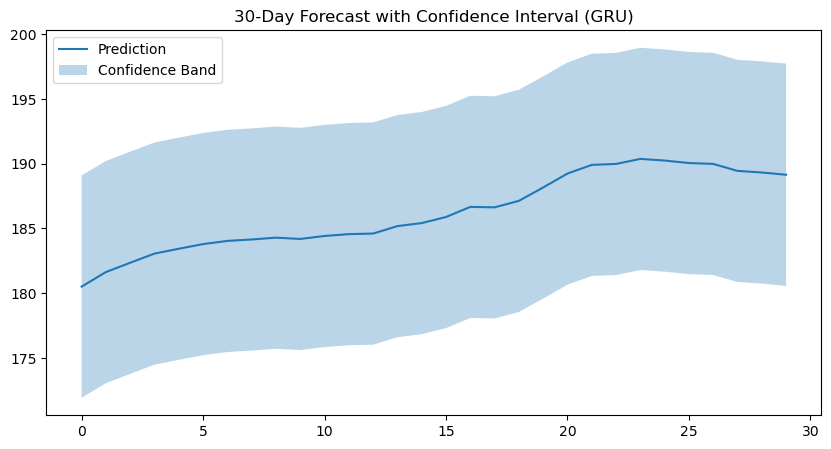

In [10]:
preds = gru_model.predict(X_test_m)

preds_real = scaler_multi.inverse_transform(
    np.hstack([preds, np.zeros((preds.shape[0],5))])
)[:,0]

actual_real = scaler_multi.inverse_transform(
    np.hstack([y_test_m.reshape(-1,1), np.zeros((y_test_m.shape[0],5))])
)[:,0]

residuals = actual_real - preds_real
std = np.std(residuals)

future = preds_real[-30:]
upper = future + 2*std
lower = future - 2*std

import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(future, label="Prediction")
plt.fill_between(range(30), lower, upper, alpha=0.3, label="Confidence Band")
plt.title("30-Day Forecast with Confidence Interval (GRU)")
plt.legend()
plt.show()
